In [8]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using AD_TAUENN
using Plots; gr();

  Activating project at `~/.julia/dev/FUSE`


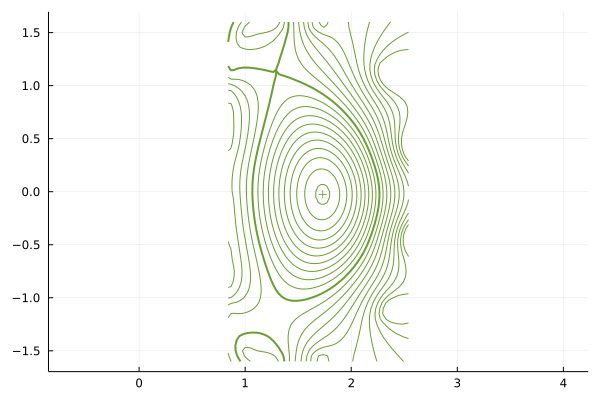

equilibrium.ids_properties was skipped in IMAS.jl data dictionary
(dd.equilibrium.time_slice[]).global_quantities.beta_tor = 0.010634147869546463
(dd.equilibrium.time_slice[]).global_quantities.beta_normal = 1.0274290315379087
(dd.equilibrium.time_slice[]).global_quantities.ip = 1.08374265e6
(dd.equilibrium.time_slice[]).global_quantities.li_3 = 0.7284145029769709


0.7284145029769709

In [18]:
if false
    ϵ = 0.32
    κ = 1.85
    δ = 0.485
    R0 = 6.2
    Z0 = 0.4
    B0 = 5.3
    ip = 15.E6
    βn = 2.0
    x_point = false#(5.0, -3.8)
    symmetric=true
    resolution = 129

    dd = IMAS.dd()
    eqt=resize!(dd.equilibrium.time_slice,-1.0)

    dd.global_time = 0.0
    FUSE.init(dd.equilibrium; B0, R0, Z0, ϵ, δ, κ, beta_n=βn, ip, x_point=x_point)
    
    eqactor = FUSE.SolovevEquilibriumActor(dd, symmetric=symmetric)
    @time FUSE.step(eqactor,verbose=false)
    FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2), 0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2))

elseif false
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","CAT_eq_ods.json")
    dd = IMAS.json2imas(filename);
    @time IMAS.flux_surfaces(dd.equilibrium);

elseif false
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","ITER_eq_ods.json")
    dd = IMAS.json2imas(filename);
    dd.equilibrium.time=[0.0]
    @time IMAS.flux_surfaces(dd.equilibrium);
else
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","D3D_eq_ods.json")
    dd = IMAS.json2imas(filename);
    dd.equilibrium.time=[0.0]
#    @time IMAS.flux_surfaces(dd.equilibrium);
end

display(plot(dd.equilibrium))
if true
    @show dd.equilibrium.time_slice[].global_quantities.beta_tor
    @show dd.equilibrium.time_slice[].global_quantities.beta_normal
    @show dd.equilibrium.time_slice[].global_quantities.ip;
    @show dd.equilibrium.time_slice[].global_quantities.li_3;
end

In [24]:
FUSE.init(dd.core_profiles, dd.equilibrium, dd.summary; ne_ped=5e19, ne_peaking=1.5, Te_ped=500, Te_peaking=3, w_ped=0.08, zeff=2, Paux=5e6, n_points=101)
FUSE.init(dd.core_sources, dd.equilibrium; Paux_e=5e6, Paux_i=5e6);

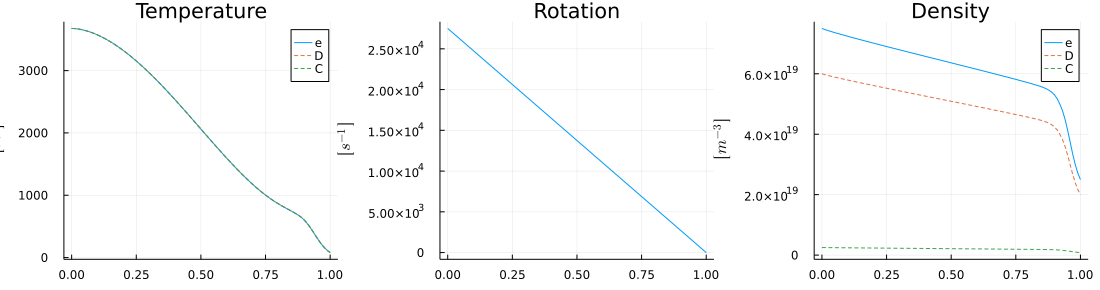

Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [1.000000, 100000.000000]
 * Minimizer: 3.676382e+03
 * Minimum: -3.299790e+00
 * Iterations: 24
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-04*|x|+2.2e-16): true
 * Objective Function Calls: 25
method = Optim.GoldenSection()
initial_lower = 1.0
initial_upper = 100000.0
minimizer = 3676.3822685649875
minimum = -3.299789727068827
iterations = 24
iteration_converged = false
converged = true
rel_tol = 0.0001
abs_tol = 2.220446049250313e-16
f_calls = 25
  0.171018 seconds (429.74 k allocations: 29.610 MiB)


local
｜pedestal
｜｜n_e
｜｜｜value ➡ [5.0e19]
｜｜position
｜｜｜rho_tor_norm ➡ [0.8795137003774954]
｜｜t_e
｜｜｜value ➡ [672.566582854996]
｜｜zeff
｜｜｜value ➡ [2.0]
time ➡ [0.0]


In [26]:
p3=plot(layout=(1,3))
using AD_EPEDNN
tauennactor = FUSE.TaueNNactor(dd)
@time FUSE.step(tauennactor,verbose=true)
FUSE.finalize(tauennactor)
display(plot!(p3,dd.core_profiles))
dd.summary

a = 0.5
n_gw = 1.2732395447351628
ne_core = missing
ne_avg = 5.5724717729350935e19
error = missing
teped = 762.1832130672188
pavg = 86114.34244973176
beta = 0.0541072371217586
betaN = 5.41072371217586
betap = 2.8676835674532057
beta_ped = 7.662301385156605
wped = 0.11450226180020362
q95 = 3.8855360777529016
taue_ped = 0.02762224069736984
Pbrem = -0.002035740194192499
Pfus = 0.34311812085749793
Qplasma = 3.4311812085749793e-8
taue = 0.00019505407737447465
tau98 = 7.634899164009012
H98 = 2.554769528508791e-5
fbs = 1.0886538410416569
input_tglf = missing
ods = dd{global_time}



Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [1.000000, 50000.000000]
 * Minimizer: 3.874294e+03
 * Minimum: -2.940660e+00
 * Iterations: 23
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-04*|x|+2.2e-16): true
 * Objective Function Calls: 24
method = Optim.GoldenSection()
initial_lower = 1.0
initial_upper = 50000.0
minimizer = 3874.2940379116053
minimum = -2.940660064514422
iterations = 23
iteration_converged = false
converged = true
rel_tol = 0.0001
abs_tol = 2.220446049250313e-16
f_calls = 24
  4.333369 seconds (7.02 M allocations: 416.956 MiB, 2.16% gc time, 95.87% compilation time)


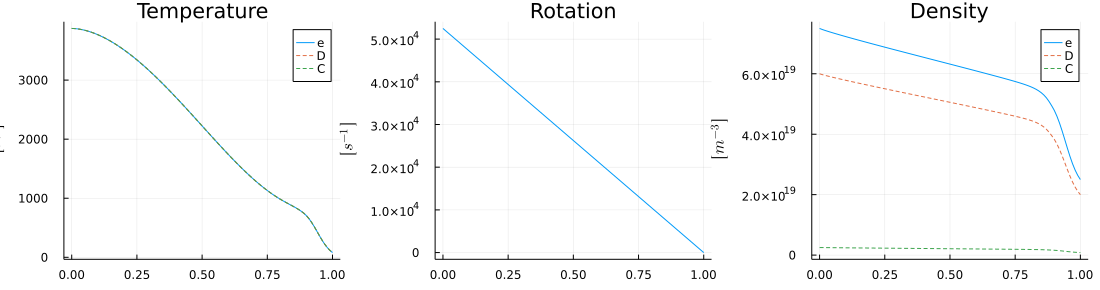

In [6]:
# currently broken
if true
    using AD_TAUENN

    # run tauenn from standalone
    inputs = TauennInputs()
    inputs.q0= 1.2
    inputs.mixing = "dc"
    inputs.ngrid = 101
    inputs.delta = 0.45
    inputs.iterations=1
    inputs.rho_fluxmatch=0.6
    inputs.error=0.001
    #display(inputs)
    @time ods, outputs = tau_enn(inputs; verbose=true);
    display(outputs)
    plot(ods.core_profiles)
end


In [16]:
IMAS.calc_beta_thermal_norm!(dd.summary, dd.equilibrium, dd.core_profiles)

2.2393438858131334

In [29]:
dd.equilibrium.time_slice[].global_quantities.magnetic_axis.b_field_tor

-1.6733549340745366